# Projeto: Análise de Vendas da Prime Store

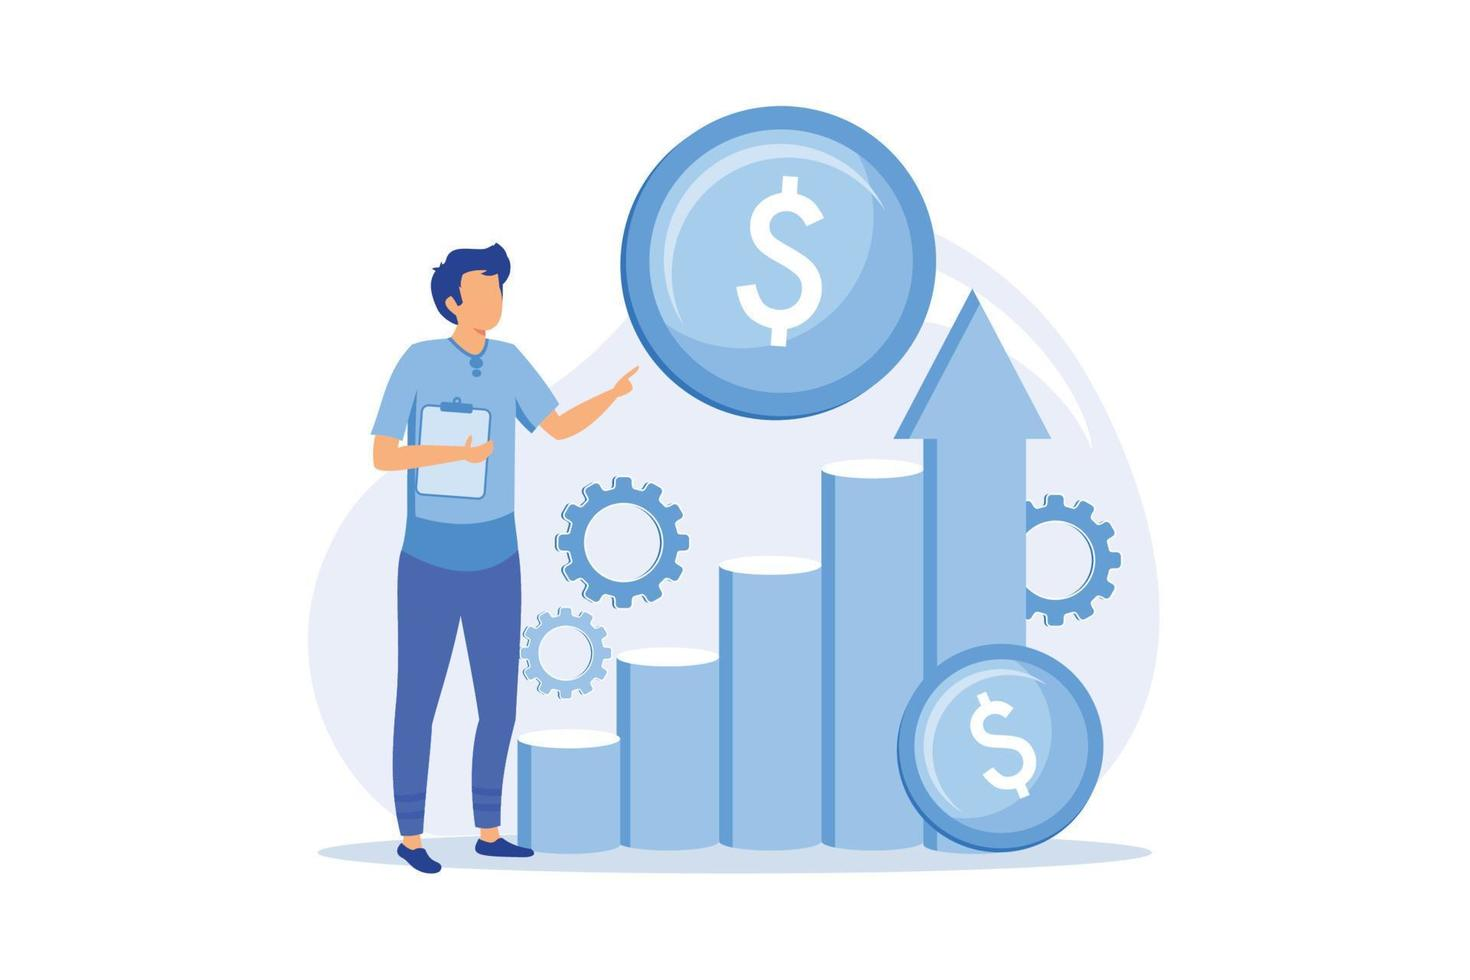

## Descrição do Projeto:

Você trabalha como analista de dados para uma loja online de eletrônicos e acessórios. A empresa quer entender melhor o comportamento de vendas, quais produtos estão se destacando e como as vendas variam ao longo do tempo. Seu papel é analisar os dados históricos de vendas e gerar insights úteis para as tomadas de decisão.

O projeto focará em uma análise descritiva dos dados de vendas, sem a necessidade de machine learning neste estágio. O principal objetivo é visualizar padrões de vendas e apresentar conclusões para ajudar a empresa a melhorar seu planejamento de estoque e identificar oportunidades de crescimento.

In [1]:
# Checando as métricas básicas das colunas numéricas 
dataframe.describe()

NameError: name 'dataframe' is not defined

### 2.4 - Observações e mudanças a serem realizadas durante a EDA

1. Alterar nome das colunas para o padrão Snake Case
2. Alterar o tipo de dado da coluna Idade para object visto que não será realizada nenhum cálculo com a mesma.
3. Dados faltantes na coluna Região (50 registros). Esses dados deverão ser substituídos aleatóriamente pelas regiões existentes no dataframe.
5. Alterar o tipo de dado da coluna Data da Compra para date e mudar o seu formato para dd/mm/aaaa.
6. Alterar o tipo da coluna Total para float.
7. Arredondamento dos valores numéricos do tipo float. (2 casas decimais).
8. Identificar e corrigir problema na coluna Idade que está com dados faltantes porém quando verificado não é exibido nenhum dado faltante.
9. Dados faltantes na coluna Idade (100 registros). Esses dados deverão ser substituídos aleatóriamente pelas idades únicas existentes no dataframe.
10. Alterar o tipo da coluna Idade para int.

## 3. Análise Exploratória de Dados (EDA)

In [ ]:
df1 = dataframe.copy()

### 3.1 - Limpeza dos dados

#### 3.1.1 - Alterações do dataframe sugeridas no item 2.4

##### - Alterar nome das colunas para o padrão Snake Case

In [ ]:
new_columns = ['id_cliente','genero','regiao','idade','nome_produto','cat_produto','preco_unit','qtde_comprada','total','frete','data']

df1 = df1.set_axis(new_columns, axis=1)

##### - Alterar o tipo de dado da coluna Idade para object visto que não será realizada nenhum cálculo com a mesma.

In [ ]:
df1['idade'] = df1['idade'].astype(str)

##### - Dados faltantes na coluna Região (50 registros). Esses dados deverão ser substituídos aleatóriamente pelas regiões existentes no dataframe.

In [ ]:
# Verificando a quantidade de registros em cada região
df1['regiao'].value_counts()

In [ ]:
# Identificando a quantidade dos valores Nan na coluna região
num_nans = df1['regiao'].isna().sum()

# Definir as regiões que serão distribuídas
regions = ['Norte', 'Sul', 'Leste', 'Oeste']

# Calculando quantos NaNs as regiões devem preencher
num_regions = len(regions)

n_per_region = round(num_nans / num_regions)

# Calculando os restantes que deverão ser distribuídos
remainder = num_nans % num_regions

# Criando uma lista com as regiões repetidas para preencher os NaNs
fill_values = regions * n_per_region + regions[:remainder]

# Embaralhando a lista das das regiões aleatóriamente
np.random.shuffle(fill_values)

# Substituindo os valores NaN da coluna regiao com os valores embaralhados anteriormente
df1.loc[df1['regiao'].isna(), 'regiao'] = fill_values

##### - Alterar o tipo de dado da coluna Data da Compra para date.

In [ ]:
# Convertendo a coluna data para o formato correto
df1['data'] = pd.to_datetime(df1['data'], format='%Y-%m-%d')

# Alterando o formato da coluna data para dd/mm/aaaa
df1['data_compra'] = df1['data'].dt.strftime('%d/%m/%Y')

# Removendo a coluna data deixando apenas a coluna data_compra devidamente convertida
df1 = df1.drop(columns=['data'])

# Convertendo a coluna data para o tipo correto
df1['data_compra'] = pd.to_datetime(df1['data_compra'], format='%d/%m/%Y')

##### - Alterar o tipo da coluna Total para float.

In [ ]:
df1['total'] = df1['total'].astype(float)

##### - Arredondamento dos valores numéricos do tipo float. (2 casas decimais)

In [ ]:
df1[['preco_unit', 'total','frete']] = df1[['preco_unit', 'total','frete']].round(2)

##### - Identificar e corrigir problema na coluna Idade que está com dados faltantes porém quando verificado não é exibido nenhum dado faltante.

In [ ]:
# Verificando os valores únicos da coluna idade
df1['idade'].unique()

**Podemos observar que realmente existem valores nan na coluna.**

In [ ]:
# Substituindo valores faltantes, espaços vazios existenes na coluna idade, por nan.
df1['idade'] = df1['idade'].replace(['', ' ','nan'], np.nan)

In [ ]:
# Verificando a quantidade de dados faltantes na coluna idade após as alterações acima.
df1['idade'].isnull().sum()

**Podemos observar que o resultado está de acordo com a primeira informação obtida na Análise Exploratória**

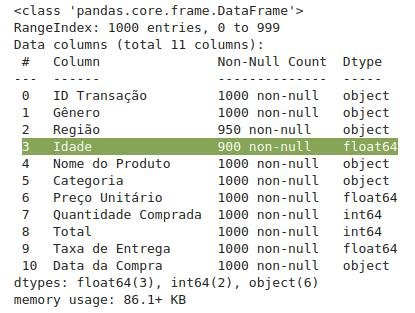

In [ ]:
df1.info()

##### - Dados faltantes na coluna Idade (100 registros). Esses dados deverão ser substituídos aleatóriamente pelas idades únicas existentes no dataframe.

In [ ]:
# Obtendo as idades únicas (não nulas)
unique_ages = df1['idade'].dropna().unique()

In [ ]:
# Preenchendo aleatóriamente os valores Nan com idades.
df1['idade'] = df1['idade'].apply(lambda x: np.random.choice(unique_ages) if pd.isnull(x) else x)

In [ ]:
df1.info()

##### - Alterar o tipo da coluna Idade para int.

In [ ]:
df1['idade'] = df1['idade'].astype(float)
df1['idade'] = df1['idade'].astype(int)

#### 3.1.2 - Salvando Dataframe após limpeza

In [ ]:
df1.to_csv(r'Data/dados_limpos.csv', index=False)

### 3.2 - Estatística Descritiva

#### 3.2.1 - Análise Univariada

##### 3.2.1.1 - Variáveis Numéricas

In [ ]:
round(df1.describe(include=[np.number]),2)

##### Análise das variáveis numéricas

**Sobre a variável idade:**

* A média de idade dos compradores é de 46 anos.
* A idade mínima de compradores é de 18 anos e a máxima é de 69 anos.
* 25% dos compradores possuem idade entre 18 e 34 anos.
* 50% dos compradores possuem idade até 48 anos.
* 75% dos compradores possuem idade até 59 anos.
* Existe uma variação grande de idade visto que o desvio padrão desta variável é de 15 anos. Isso indica que a maioria dos compradores estão com idades entre 31 e 61 anos.

**Sobre a variável preco_unit:**

* O preço médio dos produtos da loja é de 457,00 reais.
* O produto de menor valor custa 30,00 e o produto de maior valor custa 3.109,00 reais.
* 25% dos produtos estão com o preço abaixo de 30,00 e 50,00 reais.
* 50% dos produtos custam até 200,00 reais.
* 75% dos produtos custam até 800,00 reais.
* A maioria dos produtos custam entre 80,00 e 994,00 reais.

**Sobre a variável qtde_comprada:**

* A média de produtos por compra é de aproximadamente 3 produtos.
* O mínimo de produtos por compra é de 1 e o máximo é de 5 produtos.
* 25% das pessoas compram até 2 produtos a cada compra realizada.
* 50% das pessoas compram até 3 produtos a cada compra realizada.
* 75% das pessoas compram até 4 produtos a cada compra realizada.
* A maioria dos compradores compram 2 a 4 produtos a cada compra realizada. De acordo com a métrica de desvio padrão.

**Sobre a variável total:**

* A média de valor gasto em cada compra é de 1.346 reais.
* O mínimo gasto em compra foi de 30,00 e o máximo foi de 7.500,00 reais.
* 25% das pessoas gastam entre 30,00 e 200,00 reais a cada compra realizada.
* 50% das pessoas gastam até 600,00 reais em cada compra realizada.
* 75% das pessoas gastam até 1.500,00 reais em cada compra realizada.
* Existe uma variação muito grande de gasto total a cada compra de 1.834 reais aproximadamente. Isso indica que a maioria dos compradosres estão gastando entre 487,00 e 3.180,00 reais por compra realizada.

**Sobre a variável frete:**

* A média do valor de frete gasto em compras foi de 12,42 reais.
* O mínimo gasto em frete foi de 5,00 e o máximo de 19,98 reais.
* 25% das pessoas gastaram entre 5,00 e 8,56 reais em frete.
* 50% das pessoas gastaram até 12,32 reais em frete.
* 75% das pessoas gastaram até 16,08 reais em frete.
* A maioria das pessoas gastaram entre 8,00 e 17,00 em frete.

##### 3.2.1.2 - Variáveis Categóricas

In [ ]:
df1.describe(include=[object])

**Sobre a variável id:**

* Pela variável id podemos observar que de 1.000 compras realizadas, 292 foram de clientes diferentes. Ou seja, apenas 29,2% dos clientes compraram apenas uma única vez na loja. Isso indica que todo o processo de compra e qualidade dos produtos agradam os clientes visto que mais de 70% dos clientes voltam a comprar na loja. 
* Alguns clientes realizaram 9 compras recorrentes. Um deles foi o cliente de código CLI0052 do sexo masculino e da Região Oeste. Deve-se analisar se existem mais clientes estão dentro dessa mesma frequência de compras.

In [ ]:
(df1['id_cliente'].value_counts() == 9).sum()

* Observa-se que existem mais 4 clientes que fizeram 9 compras na loja.

**Sobre a variável genero:**

* Mais de 50% dos clientes (524) são homens.

In [ ]:
df1['genero'].value_counts()

**Sobre a variável regiao:**

* A região com mais números de compra é a região Oeste com 258 transações realizadas, ou seja 25,8% dos compradores são da região Oeste do país.

In [ ]:
df1['regiao'].value_counts()

**Sobre a variável nome_produto:**

* o produto mais vendido foi Monitor com 181 compras realizadas, ou seja, os monitores representam 18,1% das vendas realizadas.

In [ ]:
df1['nome_produto'].value_counts()

**Sobre a variável cat_produto:**

* Foram vendidos 477 produtos na categoria de eletrônicos o que representa 47,7% das vendas realizadas.

In [ ]:
df1['cat_produto'].value_counts()

### 3.2.2 - Análise Bivariada

#### 3.2.2.1 - Receita (Total de Vendas)

##### Variáveis: nome_produto / total

Aqui podemos observar o produto que mais gera receita para a loja

In [ ]:
top_produtos = df1.groupby('nome_produto')['total'].sum().reset_index()
top_produtos.sort_values(by='total', ascending=False)

##### Variáveis: cat_produto / total

Aqui podemos observar a categoria de produto que mais gera receita para a loja.

In [ ]:
top_cat = df1.groupby('cat_produto')['total'].sum().reset_index()
top_cat.sort_values(by='total', ascending=False)

##### Variáveis: regiao / total

Aqui podemos observar a região do Brasil que mais gera receita para a loja.

In [ ]:
top_regiao = df1.groupby('regiao')['total'].sum().reset_index()
top_regiao.sort_values(by='total', ascending=False)

##### id_cliente / total

Aqui podemos observar qual cliente gerou mais receita para a loja.

In [ ]:
top_clientes = df1.groupby('id_cliente')['total'].sum().reset_index()
top_clientes.sort_values(by='total', ascending=False).head(10)

##### Variáveis: genero / total

Aqui podemos observar quem mais gera receitas para a loja (homens ou mulheres)

In [ ]:
top_genero = df1.groupby('genero')['total'].sum().reset_index()
top_genero.sort_values(by='total', ascending=False)

#### 3.2.2.2 - Produto mais comprado

##### Variáveis: cat_produto / produto

In [ ]:
top_produto = df1.groupby('cat_produto')['produto'].sum().reset_index()
top_produto.sort_values(by='produto', ascending=False)

##### Variáveis: regiao / produto

##### Variáveis: id_cliente / produto

##### Variáveis: genero / produto

#### 3.2.2.3 - Categoria mais comprada

##### Variáveis: cat_produto / regiao

##### Variáveis: cat_produto / id_cliente

##### Variáveis: cat_produto / genero

#### 3.2.2.4 - Região que mais compra

##### Variáveis: regiao / cliente

##### Variáveis: regiao / genero

## 4. Visualização de Dados

## 5. Análise de Tendências e Sazonalidade

## 6. Insights e Recomendações

## 7. Deploy